In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-filtered-data/Movies_filtered_data.xlsx
/kaggle/input/movies/Movies.csv


In [2]:
movies = pd.read_csv("/kaggle/input/movies/Movies.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3849,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
3850,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
3851,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


In [3]:
# Highest Grossing amount 

Gross_amount = movies["gross"].sort_values(ascending=False)
Gross_amount.head(10)

0       760505847.0
25      658672302.0
28      652177271.0
16      623279547.0
64      533316061.0
230     474544677.0
2704    460935665.0
7       458991599.0
3       448130642.0
552     436471036.0
Name: gross, dtype: float64

In [4]:
#Converting a column of the dataframe to a list

genres_list = movies["genres"].head(10).to_list()
language_list = movies["language"].unique()
movies["budget"] = movies["budget"].astype(int)
budget_value = movies["budget"].head(5).to_list()


In [5]:
genres_list

['Action|Adventure|Fantasy|Sci-Fi',
 'Action|Adventure|Fantasy',
 'Action|Adventure|Thriller',
 'Action|Thriller',
 'Action|Adventure|Sci-Fi',
 'Action|Adventure|Romance',
 'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
 'Action|Adventure|Sci-Fi',
 'Adventure|Family|Fantasy|Mystery',
 'Action|Adventure|Sci-Fi']

In [6]:
language_list

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Telugu', 'Cantonese', 'Japanese',
       'Aramaic', 'Italian', 'Dutch', 'Dari', 'German', 'Mongolian',
       'Thai', 'Bosnian', 'Korean', 'Hungarian', 'Hindi', nan,
       'Icelandic', 'Danish', 'Portuguese', 'Norwegian', 'Czech',
       'Russian', 'None', 'Zulu', 'Hebrew', 'Dzongkha', 'Arabic',
       'Vietnamese', 'Indonesian', 'Romanian', 'Persian', 'Swedish'],
      dtype=object)

In [7]:
# Find out the index of IMDB rating 

movies.columns.to_list().index("imdb_score")

# First i converted all the columns to a list then applied the index() method. As dataframe doesn't have any index() method

25

<AxesSubplot:title={'center':'Most Common Movie Ratings on IMDB'}, xlabel='IMDB_Ratings', ylabel='No Of Movies'>

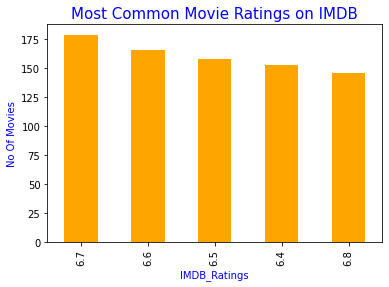

In [8]:
# This will print the values of movies whose rating are common and sort them in descending ordeer

# The most is 6.7. Nearly 175 movies are rated 6.7

import matplotlib.pyplot as plt

plt.title("Most Common Movie Ratings on IMDB", size = 15, color = "blue")
plt.xlabel("IMDB_Ratings", color = "blue")
plt.ylabel("No Of Movies", color = "blue")

movies["imdb_score"].value_counts().sort_values(ascending = False).head().plot(kind="bar", color = "orange")



### Finding out which country has produced the most gross amount from movies till 2016.

In [9]:
# Used pivot table for this solution

gross_amount_by_each_country = pd.pivot_table(data = movies, values = 'gross', index = 'country',aggfunc = sum).sort_values(by='gross', ascending= False).head(10)
gross_amount_by_each_country

,gross
country,
USA,1.739605e+11
UK,1.151228e+10
Germany,2.348426e+09
France,1.950102e+09
Australia,1.683841e+09
Canada,1.575452e+09
New Zealand,1.298160e+09
Japan,5.704129e+08
China,2.678241e+08


In [10]:
gross_amount_by_each_country_imdb = pd.pivot_table(data = movies, values = 'movie_title', index = 'country',columns = 'imdb_score',aggfunc = sum)

gross_amount_by_each_country_imdb.sort_index(ascending = False).head()

imdb_score,1.6,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.7,2.8,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
country,,,,,,,,,,,,,,,,,,,,,
West Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Das Boot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USA,Justin Bieber: Never Say Never,Disaster Movie,Who's Your Caddy?,From Justin to Kelly Glitter Crossover,Son of the Mask,Epic Movie Chairman of the Board,Battlefield Earth Gigli,Baby Geniuses,Meet the Spartans Dragonball: Evolution Date M...,Jaws: The Revenge Doogal Marci X Steel,...,Toy Story 3 Up Inside Out Batman Begins Inglou...,WALL·E Braveheart Star Wars: Episode VI - Retu...,The Dark Knight Rises Gladiator Terminator 2: ...,Interstellar Saving Private Ryan Se7en The Sil...,The Lord of the Rings: The Two Towers The Matr...,Inception Fight Club Forrest Gump Star Wars: E...,The Lord of the Rings: The Return of the King ...,The Dark Knight The Godfather: Part II,The Godfather,The Shawshank Redemption
UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Snatch 2001: A Space Odyssey Monty Python and ...,Lawrence of Arabia,Alien,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
best_country_produced = movies[(movies["country"]== "USA") | (movies["country"]== "UK") | (movies["country"]== "Germany") | (movies["country"]== "India") ]

In [12]:
best_country_produced.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000,2012.0,632.0,6.6,2.35,24000


Text(0.5, 1.0, 'Gross vs Budget')

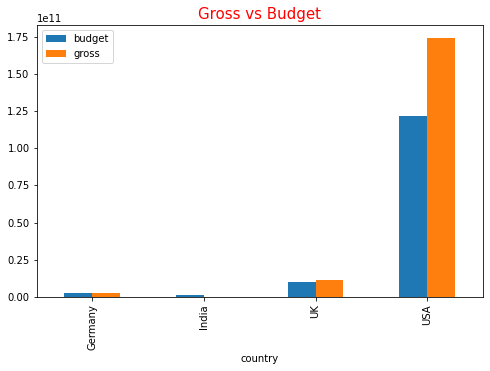

In [13]:
pd.pivot_table(best_country_produced,
index ="country",
values = ["gross","budget"],
aggfunc={"gross":np.sum,"budget":np.sum}).plot(kind='bar', figsize = (8,5))
plt.title ("Gross vs Budget", color = "red", size = 15)

In [14]:
movies.set_index("actor_1_name", inplace = True)

In [15]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
actor_1_name,,,,,,,,,,,,,,,,,,,,,
CCH Pounder,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000,2009.0,936.0,7.9,1.78,33000
Johnny Depp,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000,2007.0,5000.0,7.1,2.35,0
Christoph Waltz,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000,2015.0,393.0,6.8,2.35,85000
Tom Hardy,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000
Daryl Sabara,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shane Carruth,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000,2004.0,45.0,7.0,1.85,19000
Ian Gamazon,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000,2005.0,0.0,6.3,NaN,74
Carlos Gallardo,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000,1992.0,20.0,6.9,1.37,0


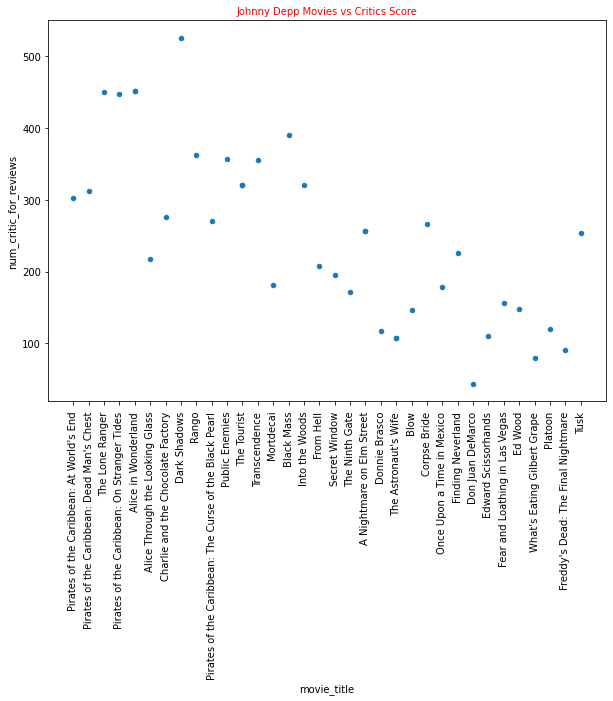

In [16]:

movies.loc[["Johnny Depp"]].plot(kind = "scatter", x = "movie_title",y ="num_critic_for_reviews",figsize= (10,7))
plt.title("Johnny Depp Movies vs Critics Score", color = "red", size = 10)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10
      }
plt.rc('font', **font)

In [17]:
movies.reset_index().head()

,actor_1_name,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,CCH Pounder,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000,2009.0,936.0,7.9,1.78,33000
1,Johnny Depp,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000,2007.0,5000.0,7.1,2.35,0
2,Christoph Waltz,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000,2015.0,393.0,6.8,2.35,85000
3,Tom Hardy,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000
4,Daryl Sabara,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,738.0,English,USA,PG-13,263700000,2012.0,632.0,6.6,2.35,24000


In [18]:
Best_movies_in_USA = movies[(movies.imdb_score >8) & (movies.budget >230000000)]

In [19]:
Best_movies_in_USA.reset_index()

,actor_1_name,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Tom Hardy,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000,2012.0,23000.0,8.5,2.35,164000
1,Robert Downey Jr.,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,...,1022.0,English,USA,PG-13,250000000,2016.0,19000.0,8.2,2.35,72000
2,Minnie Driver,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,...,570.0,Japanese,Japan,PG-13,2400000000,1997.0,851.0,8.4,1.85,11000
3,Mitsuo Iwata,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,...,430.0,Japanese,Japan,R,1100000000,1988.0,5.0,8.1,1.85,0


In [20]:
Best_movies_in_IND = movies[(movies.imdb_score >7) & (movies.budget >2300000) & (movies.country == 'India')]

In [21]:
Best_movies_in_IND.reset_index()

,actor_1_name,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Tamannaah Bhatia,Color,S.S. Rajamouli,44.0,159.0,50.0,72.0,Anushka Shetty,218.0,6498000.0,...,410.0,Telugu,India,NaN,18026148,2015.0,133.0,8.4,1.85,21000
1,Shah Rukh Khan,Color,Karan Johar,210.0,128.0,160.0,81.0,Jimmy Shergill,8000.0,4018695.0,...,235.0,Hindi,India,PG-13,12000000,2010.0,327.0,8.0,2.35,27000
2,Shah Rukh Khan,Color,Yash Chopra,29.0,192.0,147.0,397.0,Preity Zinta,8000.0,2921738.0,...,119.0,Hindi,India,NaN,7000000,2004.0,860.0,7.9,2.35,2000
3,Vidya Balan,Color,R. Balki,12.0,133.0,12.0,106.0,Abhishek Bachchan,464.0,199228.0,...,49.0,Hindi,India,NaN,150000000,2009.0,374.0,7.2,2.35,504
4,Naseeruddin Shah,Color,Mira Nair,137.0,114.0,300.0,73.0,Randeep Hooda,307.0,13876974.0,...,214.0,Hindi,India,R,7000000,2001.0,209.0,7.4,1.85,0


## Let's Work on The Filtered Movie Data

In [22]:
import pandas as pd
import numpy as np

In [23]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
movies_df = pd.read_excel("../input/movies-filtered-data/Movies_filtered_data.xlsx")
movies_df

,lead_role,movie_year,movie_title,num_voted_users,facebook_likes,imdb_score,budget
0,CCH Pounder,2009,Avatar,886204,4834,7.9,237000000
1,Johnny Depp,2007,Pirates of the Caribbean: At World's End,471220,48350,7.1,300000000
2,Christoph Waltz,2015,Spectre,275868,11700,6.8,245000000
3,Tom Hardy,2012,The Dark Knight Rises,1144337,106759,8.5,250000000
4,Daryl Sabara,2012,John Carter,212204,1873,6.6,263700000
...,...,...,...,...,...,...,...
3848,Shane Carruth,2004,Primer,72639,368,7.0,7000
3849,Ian Gamazon,2005,Cavite,589,0,6.3,7000
3850,Carlos Gallardo,1992,El Mariachi,52055,147,6.9,7000
3851,Kerry BishÃ©,2011,Newlyweds,1338,690,6.4,9000


### Visualizing all the details of each lead actors in tree map way.

In [25]:
import plotly.offline as py
import plotly.express as px
fig = px.treemap(movies_df, path=['lead_role','movie_title'],
                  color='movie_title', hover_data=['imdb_score','budget', 'num_voted_users'],color_continuous_scale='green')
autosize=True
py.iplot(fig)

#Just Double Click on any of teh box and hover over a box, You will see the full details.
#After double clicks That box will expand and it will be easy to visible and read the details.

**Fill the null value with 0**

In [26]:
movies_df= movies_df.fillna(0)
movies_df.head()

,lead_role,movie_year,movie_title,num_voted_users,facebook_likes,imdb_score,budget
0,CCH Pounder,2009,Avatar,886204,4834,7.9,237000000
1,Johnny Depp,2007,Pirates of the Caribbean: At World's End,471220,48350,7.1,300000000
2,Christoph Waltz,2015,Spectre,275868,11700,6.8,245000000
3,Tom Hardy,2012,The Dark Knight Rises,1144337,106759,8.5,250000000
4,Daryl Sabara,2012,John Carter,212204,1873,6.6,263700000


**Count the No of Movies produced only in USA**

In [27]:
total_USA_movies =  movies[movies["country"] == "USA"]
total_USA_movies.shape

(3046, 27)

**Grouping Each Country and summing all the columns values respectively**

In [28]:
country_sum = movies.groupby("country").sum()
country_sum.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
country,,,,,,,,,,,,,,,,
Afghanistan,105.0,83.0,6.0,0.0,30.0,1.127331e+06,7559,30,1.0,77.0,46000,2003.0,0.0,7.4,1.85,0
Argentina,434.0,349.0,272.0,60.0,1995.0,2.169281e+07,172766,2258,0.0,393.0,4900000,6013.0,115.0,22.8,6.05,33057
Aruba,67.0,91.0,85.0,105.0,635.0,1.007614e+07,11512,1352,0.0,141.0,35000000,1998.0,316.0,4.8,2.35,471
Australia,6348.0,4316.0,9218.0,14118.0,236847.0,1.683841e+09,3404619,355129,42.0,12114.0,1478505523,82079.0,82908.0,264.8,85.50,563828
Belgium,227.0,194.0,93.0,532.0,31324.0,1.361133e+06,58242,35930,1.0,141.0,49000000,4024.0,3015.0,13.4,4.70,14000
